# Simple Linear Regression for Human Head
## from Scratch 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset - Human Head

In [2]:
data_df = pd.read_csv('data/humanHead.csv')
data_df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### Dependent and Independent Variables

In [3]:
y = data_df[data_df.columns[2]].values  # Head Size
y[:10]

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982])

In [4]:
x = data_df[data_df.columns[3]].values
x[:10]

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375])

## Training the Data with Linear Regression Model

$$ \hat{y} = \beta_0 + \beta_1x $$

##### Calculating β's for y hat

$$ \beta_1 = \frac{\Sigma(x_i - \bar{x})(y_i - \bar{y})}{\Sigma(x_i - \bar{x})^2} $$

$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [5]:
a, b = 0, 0
x_mean, y_mean = np.mean(x), np.mean(y)

for i in range(len(x)):
    a += (x[i] - x_mean) * (y[i] - y_mean)
    b += (x[i] - x_mean) ** 2

coefficient = a / b  # β1
intercept = y_mean - coefficient * x_mean   # β0
print("Intercept: ", intercept, "\nCoefficient: ", coefficient)

Intercept:  520.6101407202468 
Coefficient:  2.4268812319697064


## Plotting the Linear Regression Model

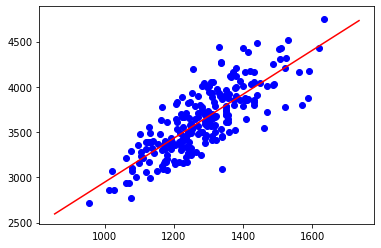

In [6]:
x1 = np.linspace(np.min(x) - 100, np.max(x) + 100, 100)
y1 = intercept + coefficient * x1
plt.plot(x1, y1, c='r')

plt.scatter(x, y, c='b')
plt.show()

## Evaluation of the Model

$$ RSS = \Sigma(y_i - \hat{y})^2 $$

$$ TSS = \Sigma(y_i - \bar{y})^2 $$

$$ R2 Score = 1 - \frac{RSS}{TSS} $$

In [7]:
RSS = 0
TSS = 0

for i in range(len(x)):
    y_hat = intercept + coefficient * x[i]
    RSS += (y[i] - y_hat) ** 2
    TSS += (y[i] - y_mean) ** 2
    
print('R2 Score: ', 1 - RSS/TSS)

R2 Score:  0.6393117199569998
